<a href="https://colab.research.google.com/github/harshnegi02/car-price-prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [ ]:
#loading data from csv to pandas dataframe
car_dataset = pd.read_csv('/content/car details kaggle.csv')

In [ ]:
# checking first 5 rows of dataframes
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#checking number of rows and columns
car_dataset.shape

(4340, 8)

In [ ]:
# Getting some information about datasets
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
# checking the number of missing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
# check the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())


fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoading the Categorial Data

In [ ]:
#encoading "Fuel" Column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':4,'Electric':5}},inplace=True)

#encoading "seller_type" Column
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':3}},inplace=True)

#encoading "transmission" Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

#encoafing "owner" Colums
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

<ipython-input-51-aa5a5196b104>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':4,'Electric':5}},inplace=True)
<ipython-input-51-aa5a5196b104>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':3}},inplace=True)
<ipython-input-51-aa5a5196b104>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly c

In [ ]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


Splitting the data and Traget  where data is X and traget is Y

In [ ]:
X=car_dataset.drop(['name','selling_price'],axis=1)   # 1 represents here column
Y=car_dataset['selling_price']

In [ ]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            0             0      0
1     2007      50000     0            0             0      0
2     2012     100000     1            0             0      0
3     2017      46000     0            0             0      0
4     2014     141000     1            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            0             0      1
4336  2014      80000     1            0             0      1
4337  2009      83000     0            0             0      1
4338  2016      90000     1            0             0      0
4339  2016      40000     0            0             0      0

[4340 rows x 6 columns]


In [ ]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting training and test data

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)  # 90 percent-training and 10 percent testing


Model training

1.Linear Regression

In [ ]:
#loading the linear regression model
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
#prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)

In [ ]:
# R square Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R square error : ",error_score)

R square error :  0.4279857028672377


Visualize the actual prices and predict the prices

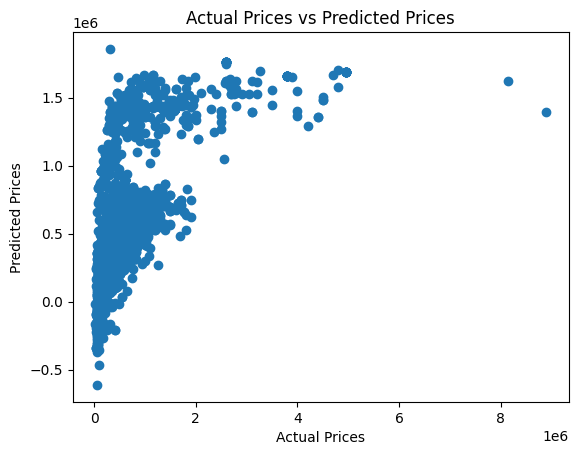

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
#prediction on Training data
test_data_prediction=lin_reg_model.predict(X_test)

In [ ]:
#R square Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R square error : ",error_score)

R square error :  0.5093376543963837


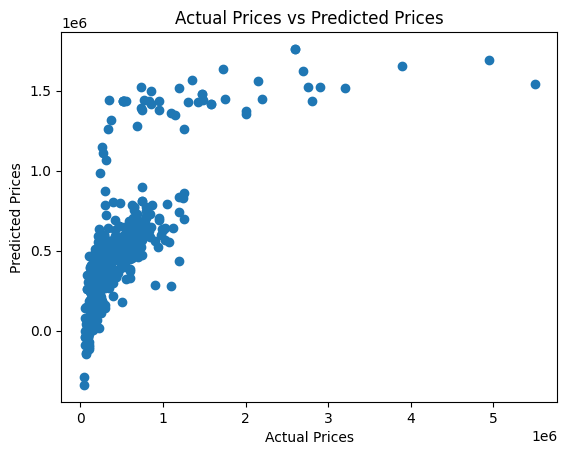

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
Lasso_reg_model=Lasso()

In [ ]:
#loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [ ]:
#prediction on training data
training_data_prediction=lass_reg_model.predict(X_train)

In [ ]:
# R square Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R square error : ",error_score)

R square error :  0.4279857028168592


Visualize the actual prices and predict the prices

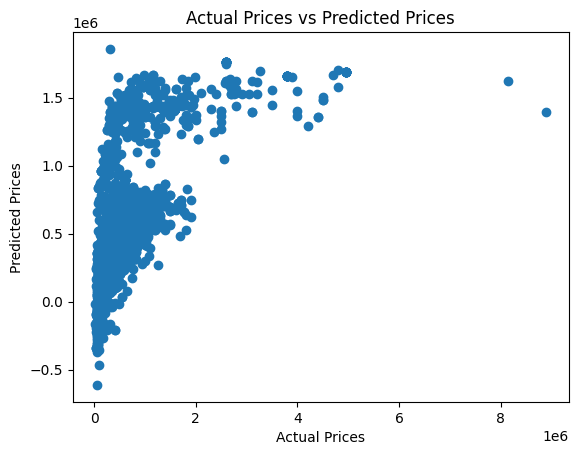

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
#prediction on Training data
test_data_prediction=lass_reg_model.predict(X_test)

In [ ]:
#R square Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R square error : ",error_score)

R square error :  0.5093376543963837


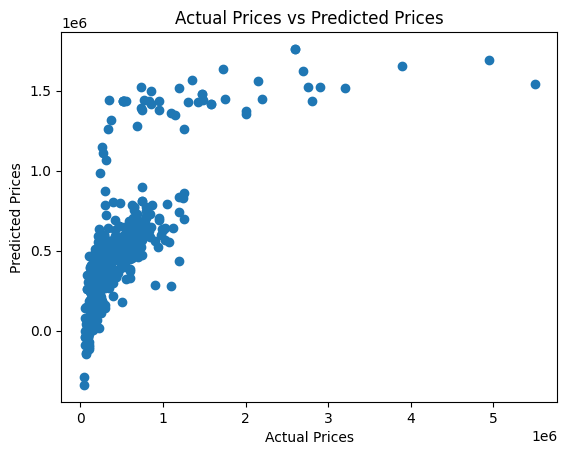

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()